In [2]:
import warnings
warnings.filterwarnings('ignore')

## Fit y Transform

In [3]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
X = pd.DataFrame([[1, 3], [np.nan, 2], [8, 5.5]])
print(X)


     0    1
0  1.0  3.0
1  NaN  2.0
2  8.0  5.5


In [4]:
# Calcula el promedio
imp.fit(X)
#imp.fit_transform(X)

SimpleImputer()

In [5]:
X_test = pd.DataFrame([[np.nan, 11], 
     [4,      np.nan], 
     [8,      2],
     [np.nan, 1]])
print(X_test)


     0     1
0  NaN  11.0
1  4.0   NaN
2  8.0   2.0
3  NaN   1.0


In [6]:
print(imp.transform(X_test))

[[ 4.5 11. ]
 [ 4.   3.5]
 [ 8.   2. ]
 [ 4.5  1. ]]


## Regresión lineal

In [7]:
import seaborn as sns
# Cargamos el dataset asncombe (https://en.wikipedia.org/wiki/Anscombe%27s_quartet) que ya viene con seaborn
anscombe = sns.load_dataset("anscombe")

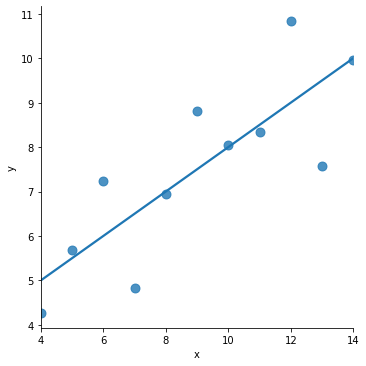

In [8]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

## Ecuación normal

In [9]:
# Generamos un conjunto de datos lineal de forma aleatoria
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

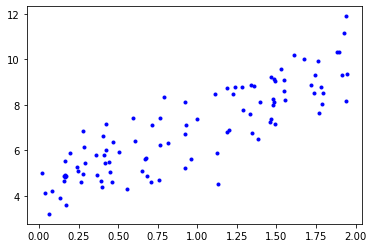

In [10]:
plt.plot(X, y, "b.")

In [11]:
X_b = np.c_[np.ones((100, 1)), X] 
mejores_params = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict_normal = X_new_b.dot(mejores_params)
y_predict_normal


array([[4.29142861],
       [9.81253876]])

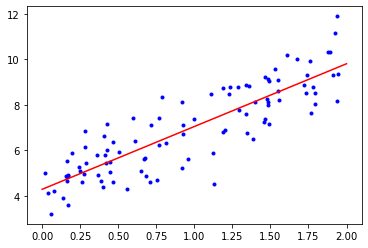

In [13]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict_normal, "r-")

In [14]:
# Desde scikit learn
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [15]:
y_predict = lin_reg.predict(X_new)

In [16]:
# Usando gradiente
# Desde scikit learn usamos el modelo SGDRegressor
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor()


In [17]:
sgd_reg.fit(X, y)

SGDRegressor()

In [18]:
sgd_y_predict = sgd_reg.predict(X_new)

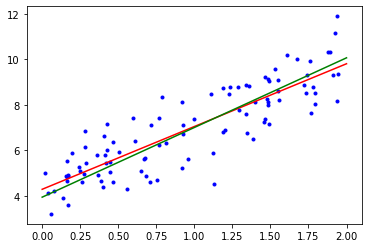

In [19]:
# Graficamos para ver la diferencia con el anterior modelo
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.plot(X_new, sgd_y_predict, "g-")

## Árboles de decisión

In [20]:
df = pd.DataFrame({"peso":[0.2, 0.3, 0.4, 0.4, 0.6, 0.4],
                   "precio":[2,4, 3, 5, 4,3],
                   "nombre":['manzana', 'manzana','naranja','manzana','naranja','manzana'] })

In [21]:
df

,peso,precio,nombre
0,0.2,2,manzana
1,0.3,4,manzana
2,0.4,3,naranja
3,0.4,5,manzana
4,0.6,4,naranja
5,0.4,3,manzana


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [23]:
X = df[['peso','precio']]
y = df['nombre']

In [24]:
clf = DecisionTreeClassifier()
model = clf.fit(X, y)

In [25]:
clf.predict([[0.4, 4]])

array(['manzana'], dtype=object)

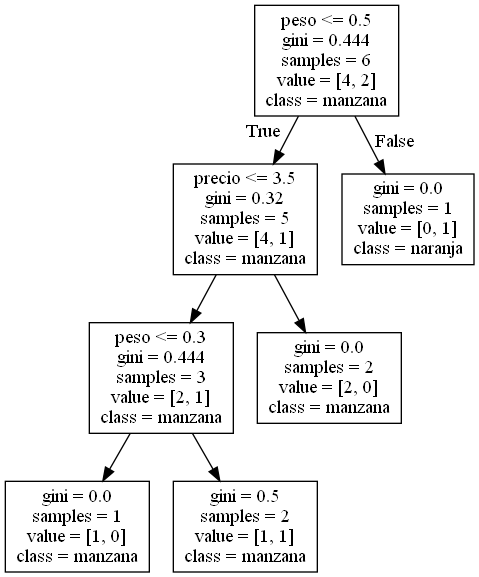

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['peso', 'precio'],
                                class_names=['manzana','naranja'])

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [27]:
df = pd.DataFrame({"peso":[0.2, 0.3, 0.4, 0.4, 0.6, 0.4],
                   "precio":[2,4, 3, 5, 4,3],
                   "diametro":[0.2,0.4, 0.3, 0.5, 0.4,0.3] })

In [28]:
df

,peso,precio,diametro
0,0.2,2,0.2
1,0.3,4,0.4
2,0.4,3,0.3
3,0.4,5,0.5
4,0.6,4,0.4
5,0.4,3,0.3


In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
X = df[['peso','precio']]
y = df['diametro']

In [31]:
clf = DecisionTreeRegressor()
model = clf.fit(X, y)

In [32]:
clf.predict([[0.3, 5]])

array([0.5])

## KNN

In [33]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target


In [34]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 

knn.predict(iris_X_test)




array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [35]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Visualización KNN

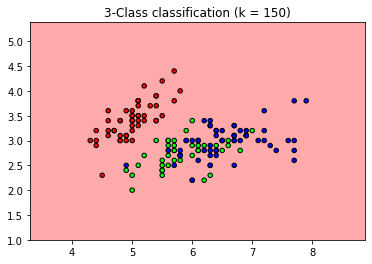

In [36]:
# Ejemplo tomado de scikit-learn  
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_nearest_centroid.html#sphx-glr-auto-examples-neighbors-plot-nearest-centroid-py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 150

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


    # we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors))

plt.show()